In [1]:
import pandas as pd
import numpy as np
import json
from IPython.display import Image
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.multiclass import OneVsRestClassifier

In [2]:
df = pd.read_csv('dataset/tmdb_5000_movies.csv')

In [3]:
#only US movies
usmovieindex = []
for i in range(len(df.production_countries)):
    row = json.loads(df.production_countries[i])
    for j in range(len(row)):
        if row[j]['iso_3166_1'] == 'US':
            usmovieindex.append(i)
usmovie = df.iloc[usmovieindex]
#overview = usmovie['overview']

Back to the full dataset.

We want to predict genres using overview, actor, etc.. In this particular case, it makes sense because TMDB data is user edited data. It is not given by experts or movie companies. This algorithm can help TMDB add labels to its film or predict whether their users' contribution makes sense.

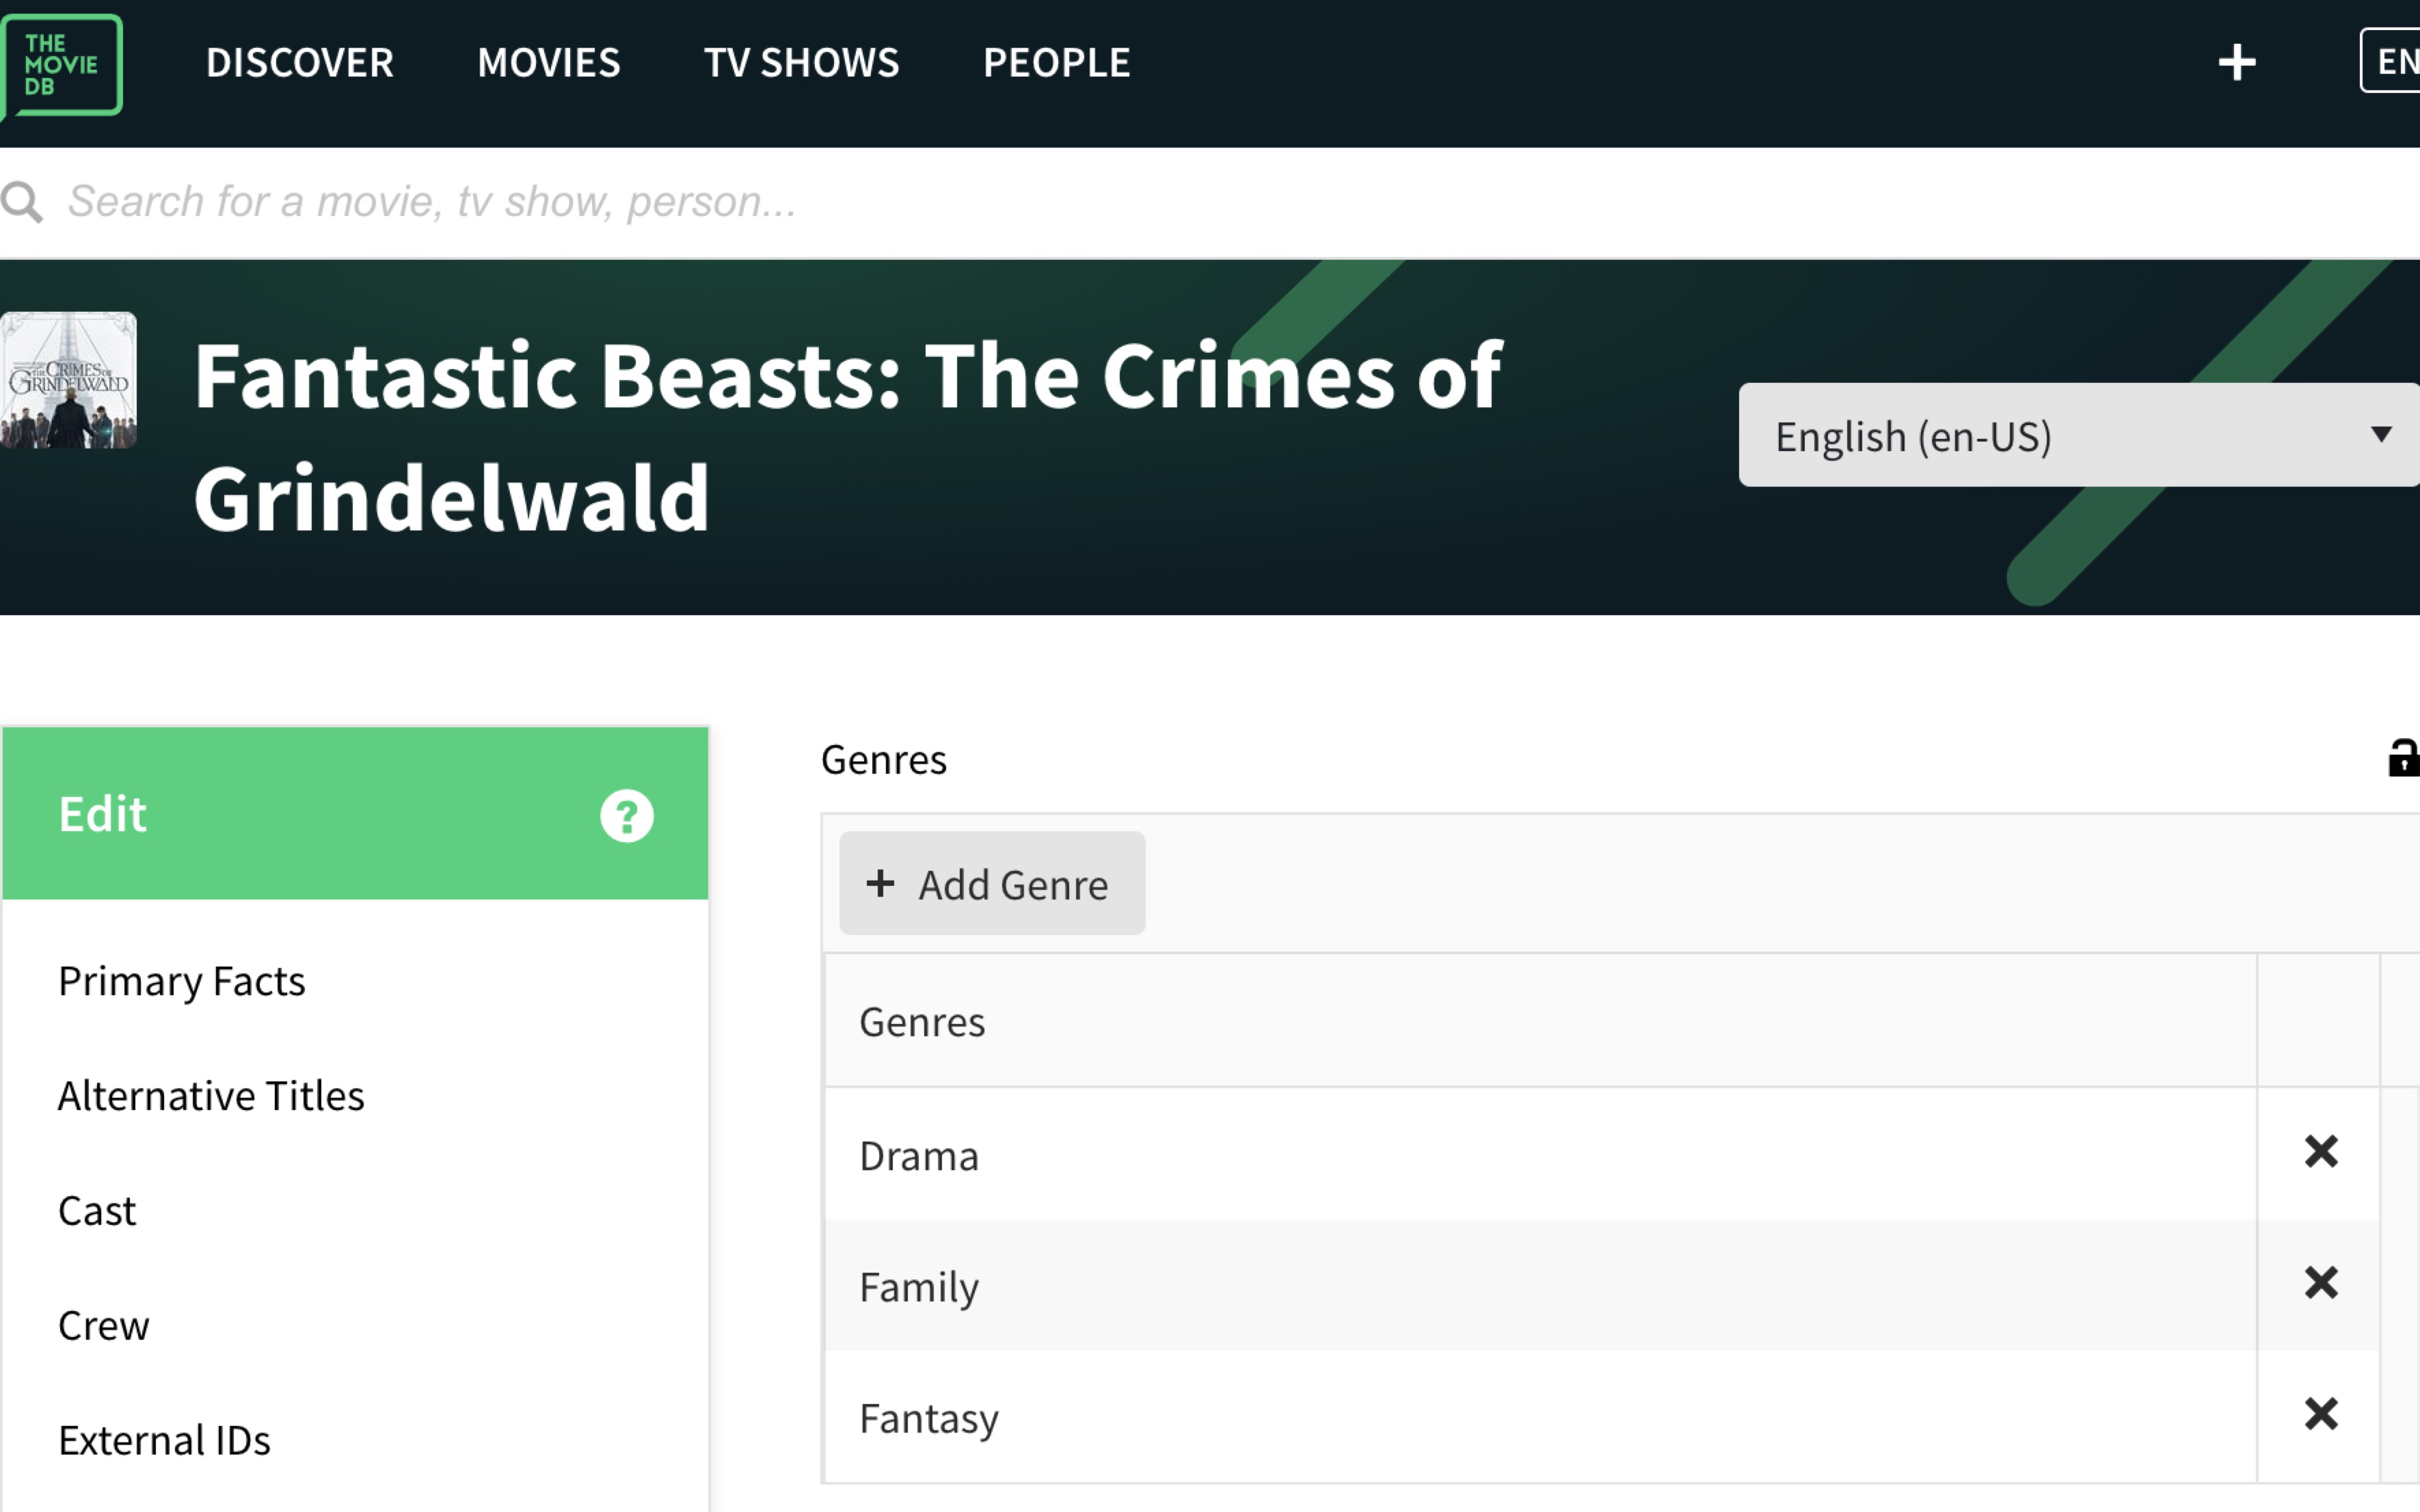

In [4]:
# photo: everyone can add label to a movie
Image(filename = "edit_genres.jpg", width=400, height=400)

In [5]:
overview = df['overview'].astype(str)

In [6]:
def fit_model():
    "Fit your single best model, returning model and accuracy."

    # Example solution; Replace with your solution
    from sklearn.naive_bayes import MultinomialNB
    from sklearn.feature_extraction.text import TfidfVectorizer
    vectorizer = TfidfVectorizer(stop_words='english',binary=True, ngram_range=(1, 2),min_df=0.001)
    train_features = vectorizer.fit_transform(train_data)
    test_features = vectorizer.transform(test_data)
    
    model = MultinomialNB()
    model.fit(train_features, train_target)
    predicted = model.predict(test_features)
    
    return model, accuracy_score(predicted, test_target)

In [7]:
def returnlabel(dfcolumn,varname,targetvar):
    usmovieindex = []
    for i in range(len(dfcolumn)):
        row = json.loads(dfcolumn[i])
        for j in range(len(row)):
            if row[j][varname] == targetvar:
                usmovieindex.append(i)
    return usmovieindex

One label

In [8]:
action = returnlabel(df.genres,'name','Action')
labelaction = [0] * len(df.genres)
for e in action:
    labelaction[e] = 1
train_data, test_data, train_target, test_target = train_test_split(overview,
                                                                    labelaction)

In [9]:
model, accuracy = fit_model()
accuracy

0.8051623646960866

In [10]:
adventure = returnlabel(df.genres,'name','Adventure')
label_adventure = [0] * len(df.genres)
for e in adventure:
    label_adventure[e] = 1
train_data, test_data, train_target, test_target = train_test_split(overview,
                                                                    label_adventure)
model, accuracy = fit_model()
accuracy

0.8343047460449625

In [11]:
crime = returnlabel(df.genres,'name','Crime')
label_crime = [0] * len(df.genres)
for e in crime:
    label_crime[e] = 1
train_data, test_data, train_target, test_target = train_test_split(overview,
                                                                    label_crime)
model, accuracy = fit_model()
accuracy

0.86511240632806

Multi label -- testing 3 genres


In [12]:
indicator_matrix = np.array([labelaction,label_adventure,label_crime]).transpose()

In [13]:
train_data, test_data, train_target, test_target = train_test_split(overview,
                                                                    indicator_matrix)

In [14]:
vectorizer = TfidfVectorizer(stop_words='english',binary=True, ngram_range=(1, 2),min_df=0.001)
train_features = vectorizer.fit_transform(train_data)
test_features = vectorizer.transform(test_data)

In [15]:
from sklearn.multiclass import OneVsRestClassifier
model = MultinomialNB()
mult_model = OneVsRestClassifier(model)
mult_model.fit(train_features, train_target)
predicted = mult_model.predict(test_features)

In [16]:
accuracy_score(predicted, test_target)

0.6253122398001665